In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memisahkan training data dan testing data
from sklearn.model_selection import train_test_split

# Fungsi untuk memanggil model Machine Learning
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export, export_graphviz, plot_tree
from sklearn.cluster import KMeans

# Fungsi untuk melakukan normalisasi dan standardisasi data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fungsi untuk menghitung evaluation metrics
from sklearn import metrics, datasets

## Multiclass Logistic Regression

Classification - menentukan sebuah data itu masuk kelas / kategori mana

> kur

In [2]:
data_iris = datasets.load_iris()

In [4]:
data_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Define x / feature/ parameters 
x = pd.DataFrame(data_iris['data'], columns=data_iris['feature_names'])
y = pd.DataFrame(data_iris['target'], columns=['type'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Initiate and train the model
model = LogisticRegression()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score: {}'.format(accuracy))

Accuracy score: 0.8333333333333334


C:\Users\ifans\miniconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
model.coef_[0]

array([-1.04902721,  1.02502481, -1.78547737, -1.64014386])

In [7]:
model.intercept_

array([-0.4547459 ,  1.76572446, -1.31097856])

In [8]:
y['type'].unique()

array([0, 1, 2])

In [13]:
model.coef_[0]

array([-1.04902721,  1.02502481, -1.78547737, -1.64014386])

In [11]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



In [15]:
import math
# [x1, x2, x3] @ [y1, y2, y3] --> (x1.y1) + (x2.y2) + (x3.y3)

# f1((x1b1 + x2b2 + ...) + b0)

print(sigmoid((model.coef_[0] @ x_test[5]) + model.intercept_[0]))
print(sigmoid((model.coef_[1] @ x_test[5]) + model.intercept_[1]))
print(sigmoid((model.coef_[2] @ x_test[5]) + model.intercept_[2]))

model.predict([x_test[5]])

print(metrics.classification_report(y_test, y_pred))

NameError: name 'sigmoid' is not defined

## Decision Tree

- Model Machine Learning yang agak beda, karena pada Decision Tree:
    - data tidak perlu di standarisasi

In [19]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

In [20]:
data_university = university

In [21]:
data_university.head()

,GRE,TOEFL,GPA,Research,University Class
0,330,115,9.34,Y,1
1,302,102,8.00,N,0
2,328,116,9.50,Y,1
3,334,119,9.70,Y,1
4,336,119,9.80,Y,1


In [37]:
# def convert_research(row):
#     if(row['Research'] == 'Y'):
#         return 1
#     return 0
# data_university['Research'] = data_university.apply(convert_research,axis=1)

def convert_research(value):
    if value == 'Y':
        return 1
    return 0
data_university['Research'] = data_university['Research'].apply(convert_research)

# Define x / feature/ parameters 
x = data_university.drop(columns=['University Class'])
y = data_university['University Class']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate and train the model
model = DecisionTreeClassifier()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score: {}'.format(accuracy))

Accuracy score: 0.9545454545454546


In [27]:
model.feature_importances_

array([0.04984721, 0.04916225, 0.90099054, 0.        ])

<AxesSubplot:ylabel='column'>

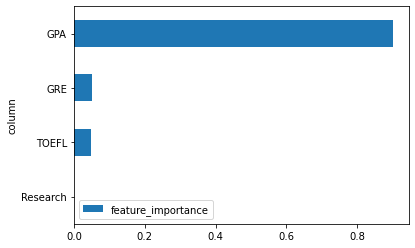

In [35]:
feature_importance = pd.DataFrame({
    'column':x.columns,
    'feature_importance':model.feature_importances_
}).sort_values('feature_importance', ascending = True)
feature_importance.plot.barh(x='column', y='feature_importance')

In [46]:
#blum keliatan featurenya
print(export.export_text(model))

TypeError: 'out_file' is an invalid keyword argument for print()

In [41]:
#keliatan featurenya
print(export.export_text(model, feature_names = list(x.columns)))

|--- GPA <= 8.59
|   |--- TOEFL <= 102.50
|   |   |--- class: 0
|   |--- TOEFL >  102.50
|   |   |--- GPA <= 7.89
|   |   |   |--- class: 0
|   |   |--- GPA >  7.89
|   |   |   |--- class: 1
|--- GPA >  8.59
|   |--- GRE <= 319.00
|   |   |--- GPA <= 8.88
|   |   |   |--- class: 1
|   |   |--- GPA >  8.88
|   |   |   |--- class: 0
|   |--- GRE >  319.00
|   |   |--- GPA <= 8.70
|   |   |   |--- TOEFL <= 109.50
|   |   |   |   |--- class: 1
|   |   |   |--- TOEFL >  109.50
|   |   |   |   |--- class: 0
|   |   |--- GPA >  8.70
|   |   |   |--- class: 1



In [47]:
export_graphviz(model, feature_names = list(x.columns),out_file='tree.txt')
#copy tree.txt nya copas hasilnya ke http://www.webgraphviz.com/

In [ ]:
#bahasa di decision tree
    #GINI
    #ENTROPY

In [52]:
import sklearn
from sklearn import tree
sklearn.tree.export_graphviz(model)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 8.585\\ngini = 0.452\\nsamples = 84\\nvalue = [29, 55]"] ;\n1 [label="X[1] <= 102.5\\ngini = 0.128\\nsamples = 29\\nvalue = [27, 2]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 22\\nvalue = [22, 0]"] ;\n1 -> 2 ;\n3 [label="X[2] <= 7.89\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2]"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 5\\nvalue = [5, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n3 -> 5 ;\n6 [label="X[0] <= 319.0\\ngini = 0.07\\nsamples = 55\\nvalue = [2, 53]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="X[2] <= 8.885\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n7 -> 9 ;\n10 [label="X[2] <= 8.7\\ngini = 0.038\\nsamples = 52\\nvalue = [1, 51]"] ;\n6 -> 10 ;\n11 [label="

[Text(141.64615384615385, 195.696, 'X[2] <= 8.585\ngini = 0.452\nsamples = 84\nvalue = [29, 55]'),
 Text(51.50769230769231, 152.208, 'X[1] <= 102.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(77.26153846153846, 108.72, 'X[2] <= 7.89\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(51.50769230769231, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(103.01538461538462, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(231.7846153846154, 152.208, 'X[0] <= 319.0\ngini = 0.07\nsamples = 55\nvalue = [2, 53]'),
 Text(180.27692307692308, 108.72, 'X[2] <= 8.885\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(154.52307692307693, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(206.03076923076924, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 8.7\ngini = 0.038\nsamples = 52\nvalue = [1, 51]'),
 Text(257.53846153846155, 65.232, '

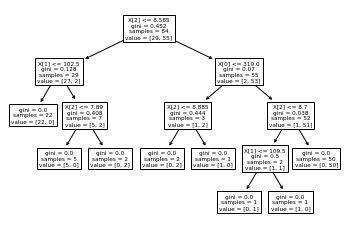

In [54]:
tree.plot_tree(model)

<AxesSubplot:xlabel='GPA', ylabel='University Class'>

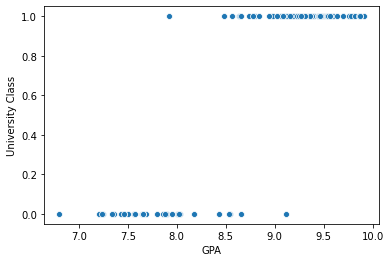

In [59]:
sns.scatterplot(data=data_university,x='GPA',y='University Class')

## KMeans

In [67]:
df_university = data_university[['GRE','GPA']]
df_university.head()

,GRE,GPA
0,330,9.34
1,302,8.00
2,328,9.50
3,334,9.70
4,336,9.80


<AxesSubplot:xlabel='GRE', ylabel='GPA'>

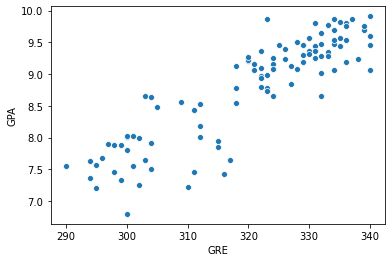

In [68]:
sns.scatterplot(data=df_university,x='GRE',y='GPA')

In [73]:
#Step unsupervised learning

#import the data
df_university = data_university[['GRE','GPA']]

#scale the data
scaler = StandardScaler()
df_university_scaled = scaler.fit_transform(df_university)

#initiate the model
model = KMeans(n_clusters=2 ,random_state=1)

#training process
model.fit(df_university_scaled)

KMeans(n_clusters=2, random_state=1)

In [79]:
labels = pd.DataFrame(model.labels_, columns=['label'])

In [74]:
df_university

,GRE,GPA
0,330,9.34
1,302,8.00
2,328,9.50
3,334,9.70
4,336,9.80
...,...,...
101,320,9.27
102,304,7.92
103,332,9.02
104,337,9.87


<AxesSubplot:xlabel='GRE', ylabel='GPA'>

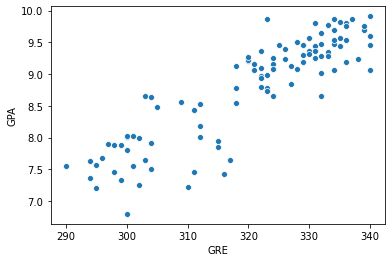

In [88]:
labelled = pd.concat([df_university,labels])
sns.scatterplot(data=labelled,x='GRE',y='GPA')

In [84]:
labelled

,GRE,GPA,label
0,330.0,9.34,NaN
1,302.0,8.00,NaN
2,328.0,9.50,NaN
3,334.0,9.70,NaN
4,336.0,9.80,NaN
...,...,...,...
101,NaN,NaN,0.0
102,NaN,NaN,1.0
103,NaN,NaN,0.0
104,NaN,NaN,0.0
